
このノートブックを実行するには、次の追加ライブラリが必要です。 Colab での実行は実験的なものであることに注意してください。問題がある場合は、Github の問題を報告してください。


In [ ]:
!pip install d2l==1.0.0-beta0



# 幾何学と線形代数演算

:label: `sec_geometry-linear-algebraic-ops`

 :numref: `sec_linear-algebra`では、線形代数の基礎を学び、それを使用してデータを変換するための一般的な演算を表現する方法を確認しました。線形代数は、深層学習やより広範な機械学習において行われる多くの研究の基礎となる重要な数学的柱の 1 つです。 :numref: `sec_linear-algebra`には、最新の深層学習モデルの仕組みを伝えるのに十分な機構が含まれていましたが、この主題にはさらに多くのことがあります。このセクションでは、線形代数演算のいくつかの幾何学的解釈に焦点を当て、固有値や固有ベクトルを含むいくつかの基本的な概念を紹介しながらさらに深く掘り下げていきます。

## ベクトルの幾何学

まず、空間内の点または方向としてのベクトルの 2 つの一般的な幾何学的解釈について説明する必要があります。基本的に、ベクトルは以下の Python リストのような数値のリストです。


In [1]:
v = [1, 7, 0, 1]


数学者はほとんどの場合、これを*列ベクトル*または*行*ベクトル、つまり次のいずれかとして記述します。

 $$ \mathbf{x} = \begin{bmatrix}1\7\0\1\end{bmatrix}, $$

また

$$ \mathbf{x}^\top = \begin{bmatrix}1 &amp; 7 &amp; 0 &amp; 1\end{bmatrix}。 $$

これらは多くの場合異なる解釈を持ちます。データ例は列ベクトルであり、重み付き合計を形成するために使用される重みは行ベクトルです。ただし、柔軟であることが有益な場合もあります。 :numref: `sec_linear-algebra`で説明したように、単一ベクトルのデフォルトの方向は列ベクトルですが、表形式のデータセットを表す行列では、各データ例を行列内の行ベクトルとして扱う方がより一般的です。

ベクトルが与えられた場合、それを空間内の点として解釈する必要があります。 2 次元または 3 次元では、ベクトルの成分を使用して、*原点*と呼ばれる固定基準と比較して空間内の点の位置を定義することで、これらの点を視覚化できます。これは :numref: `fig_grid`で確認できます。 

![](../img/grid-points.svg) :ラベル: `fig_grid`

この幾何学的観点により、問題をより抽象的なレベルで検討できるようになります。写真を猫か犬のどちらかに分類するといった、一見克服不可能に見える問題に直面することはなくなり、タスクを空間内の点の集合として抽象的に検討し、点の 2 つの異なるクラスターを分離する方法を発見するというタスクをイメージできるようになります。

並行して、人々がベクトルに対してよく取る 2 番目の視点があります。それは空間内の方向です。ベクトル $\mathbf{v} = [3,2]^\top$ を原点から $3$ 単位右、$2$ 単位上にある位置と考えることもできます。方向そのものは、右に $3$ ずつ進み、上に $2$ ずつ進みます。このようにして、figure :numref: `fig_arrow`内のすべてのベクトルを同じとみなします。 

![](../img/par-vec.svg) :ラベル: `fig_arrow`

この変更の利点の 1 つは、ベクトルの加算の動作を視覚的に理解できることです。特に、 :numref: `fig_add-vec`に見られるように、一方のベクトルによって与えられる方向に従い、次にもう一方のベクトルによって与えられる方向に従います。 

![](../img/vec-add.svg) :label: `fig_add-vec`

ベクトル減算も同様の解釈になります。 $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$ という恒等式を考慮すると、ベクトル $\mathbf{u}-\mathbf{v} が次のことがわかります。 $ は、点 $\mathbf{v}$ から点 $\mathbf{u}$ へ向かう方向です。

## ドット積と角度

:numref: `sec_linear-algebra`で見たように、2 つの列ベクトル $\mathbf{u}$ と $\mathbf{v}$ を取得すると、次の計算によってそれらの内積を形成できます。

 $$\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.$$ :eqlabel: `eq_dot_def`

 :eqref: `eq_dot_def`対称であるため、古典的な乗算の表記を反映して次のように書きます。

 $$ \mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}, $$

ベクトルの順序を交換しても同じ答えが得られるという事実を強調します。

内積 :eqref: `eq_dot_def`も幾何学的な解釈が可能です。これは 2 つのベクトル間の角度に密接に関係しています。 :numref: `fig_angle`に示されている角度を考えてみましょう。 

![](../img/vec-angle.svg) :ラベル: `fig_angle`

まず、2 つの特定のベクトルを考えてみましょう。

 $$ \mathbf{v} = (r,0) ; \text{そして} ; \mathbf{w} = (s\cos(\theta), s \sin(\theta))。 $$

ベクトル $\mathbf{v}$ は長さ $r$ で $x$ 軸に平行で、ベクトル $\mathbf{w}$ は長さ $s$ で角度 $\theta$ です。 $x$ 軸。これら 2 つのベクトルの内積を計算すると、次のことがわかります。

 $$ \mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = |\mathbf{v}||\mathbf{w}|\cos(\theta)。 $$

簡単な代数操作を行うことで、項を並べ替えて次の結果を得ることができます。

 $$ \theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{|\mathbf{v}||\mathbf{w}|}\right)。 $$

つまり、これら 2 つの特定のベクトルについては、ノルムと組み合わせた内積によって 2 つのベクトル間の角度がわかります。これと同じ事実が一般に当てはまります。ただし、$|\mathbf{v} - \mathbf{w}|^2$ を 2 つの方法で書くことを考えると、ここでは式を導出しません。1 つは内積を使用し、もう 1 つは余弦の法則を使用して幾何学的に記述します。 、完全な関係を取得できます。実際、任意の 2 つのベクトル $\mathbf{v}$ と $\mathbf{w}$ について、2 つのベクトル間の角度は次のようになります。

 $$\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{|\mathbf{v}||\mathbf{w}|}\right).$$ :eqlabel : `eq_angle_forumla`

計算では 2 次元を参照するものは何もないため、これは素晴らしい結果です。実際、これを 3 次元や 300 万次元でも問題なく使用できます。

簡単な例として、ベクトルのペア間の角度を計算する方法を見てみましょう。


In [2]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l


def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)


今は使用しませんが、角度が $\pi/2$ (または同等の $90^{\circ}$) であるベクトルを*直交*していると呼ぶことを知っておくと便利です。上の方程式を調べると、$\theta = \pi/2$ の場合にこれが起こることがわかります。これは $\cos(\theta) = 0$ と同じことです。これが発生する唯一の方法は、内積自体が 0 で、$\mathbf{v}\cdot\mathbf{w} = 0$ の場合にのみ 2 つのベクトルが直交する場合です。これは、物体を幾何学的に理解するときに役立つ公式であることがわかります。

 「角度を計算することがなぜ役立つのですか?」という疑問は当然です。答えは、データに期待される不変性の種類にあります。すべてのピクセル値は同じですが、明るさが $10%$ 高い、画像と複製画像を考えてみましょう。個々のピクセルの値は、一般に元の値からはかけ離れています。したがって、元の画像と暗い画像の間の距離を計算すると、その距離は大きくなる可能性があります。ただし、ほとんどの ML アプリケーションでは、*内容は*同じです。猫/犬分類器に関する限り、コンテンツは依然として猫の画像です。しかし、角度を考慮すると、どのベクトル $\mathbf{v}$ についても、$\mathbf{v}$ と $0.1\cdot\mathbf{v}$ の間の角度がゼロであることがわかります。これは、スケーリング ベクトルが同じ方向を維持し、長さを変更するだけであるという事実に対応します。この角度では、暗い画像が同一であると見なされます。

このような例はどこにでもあります。テキストでは、同じことを述べた文書を 2 倍の長さで書いても、議論されているトピックが変わらないようにしたい場合があります。一部のエンコード (一部の語彙内の単語の出現数を数えるなど) では、これはドキュメントをエンコードするベクトルの 2 倍に相当するため、ここでも角度を使用できます。

### コサイン類似度

2 つのベクトルの近さを測定するために角度が使用される ML コンテキストでは、専門家は $$ \cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w の部分を指すために*コサイン類似度という*用語を採用します。 }}{|\mathbf{v}||\mathbf{w}|}。 $$

コサインは、2 つのベクトルが同じ方向を向いている場合は最大値 $1$ をとり、反対方向を向いている場合は最小値 $-1$ をとり、2 つのベクトルが直交している場合は値 $0$ をとります。高次元ベクトルの成分が平均 $0$ でランダムにサンプリングされた場合、それらのコサインはほぼ常に $0$ に近くなることに注意してください。

## 超平面

ベクトルの操作に加えて、線形代数をさらに進めるために理解する必要があるもう 1 つの重要なオブジェクトは、線 (2 次元) または平面 (3 次元) の高次元への一般化である超*平面*です。 $d$ 次元のベクトル空間では、超平面は $d-1$ 次元を持ち、空間を 2 つの半空間に分割します。

例から始めましょう。列ベクトル $\mathbf{w}=[2,1]^\top$ があるとします。私たちは、「$\mathbf{w}\cdot\mathbf{v} = 1$ のときの点 $\mathbf{v}$ は何ですか?」を知りたいのです。 :eqref: `eq_angle_forumla`の上の内積と角度の関係を思い出すと、これが $$ |\mathbf{v}||\mathbf{w}|\cos(\theta) = 1 ; と同等であることがわかります。 \iff ; |\mathbf{v}|\cos(\theta) = \frac{1}{|\mathbf{w}|} = \frac{1}{\sqrt{5}}。 $$ 

![](../img/proj-vec.svg) :label: `fig_vector-project`

この式の幾何学的意味を考慮すると、これは $\mathbf{v}$ の $\mathbf{w}$ の方向への射影の長さがちょうど $1/|\mathbf であると言うのと同じであることがわかります。 {w}|$、 :numref: `fig_vector-project`に示されているように。これが当てはまるすべての点の集合は、ベクトル $\mathbf{w}$ に直角な直線です。必要に応じて、この直線の方程式を見つけて、$2x + y = 1$、または同等の $y = 1 - 2x$ であることがわかります。

 $\mathbf{w}\cdot\mathbf{v} &gt; 1$ または $\mathbf{w}\cdot\mathbf{v} &lt; 1$ の点の集合について尋ねたときに何が起こるかを見てみましょう。これらは、それぞれ、射影が $1/|\mathbf{w}|$ よりも長いか短い場合であることがわかります。したがって、これら 2 つの不等式は線のどちらかの側を定義します。このようにして、空間を 2 つの半分に分割する方法を見つけました。 :numref: `fig_space-division`でわかるように、片側のすべての点の内積がしきい値よりも小さく、もう一方の側はしきい値よりも上になります。 

![](../img/space-division.svg) :label: `fig_space-division`

高次元の話もほぼ同じです。 $\mathbf{w} = [1,2,3]^\top$ として、$\mathbf{w}\cdot\mathbf{v} = 1$ で 3 次元の点について尋ねると、次のようになります。与えられたベクトル $\mathbf{w}$ に直角な平面。 :numref: `fig_higher-division`に示すように、2 つの不等式によって平面の 2 つの側面が定義されます。 

![](../img/space-division-3d.svg) :label: `fig_higher-division`

この時点で私たちの視覚化能力は尽きてしまいますが、私たちがこれを数十、数百、あるいは数十億の次元で行うことを妨げるものは何もありません。これは、機械学習モデルについて考えるときによく発生します。たとえば、 :numref: `sec_softmax`のような線形分類モデルは、さまざまなターゲット クラスを分離する超平面を見つける方法として理解できます。この文脈では、そのような超平面はしばしば*決定平面*と呼ばれます。深層学習された分類モデルの大部分は、ソフトマックスに供給される線形層で終了するため、ターゲット クラスを超平面によってきれいに分離できるように、非線形埋め込みを見つけることがディープ ニューラル ネットワークの役割であると解釈できます。

手作りの例を挙げると、定義する平均値間のベクトルを取得するだけで、Fashion-MNIST データセット ( :numref: `sec_fashion_mnist`で参照) から T シャツとズボンの小さな画像を分類する合理的なモデルを生成できることに注目してください。決定面と眼球は大まかなしきい値です。まず、データをロードして平均を計算します。


In [3]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)


これらの平均を詳細に調べることは有益な場合があるので、それらがどのようになるかをプロットしてみましょう。この場合、平均は確かに T シャツのぼやけた画像に似ていることがわかります。


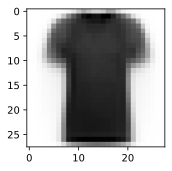

In [4]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()


2 番目のケースでも、平均がズボンのぼやけた画像に似ていることがわかります。


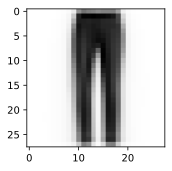

In [5]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()


完全に機械学習されたソリューションでは、データセットからしきい値を学習します。この場合、トレーニング データ上で適切と思われるしきい値を手動で目視しただけです。


In [6]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)


## 線形変換の幾何学

:numref: `sec_linear-algebra`と上記の議論を通じて、ベクトル、長さ、角度の幾何学についてしっかりと理解しました。ただし、説明を省略した重要な目的が 1 つあります。それは、行列で表される線形変換の幾何学的理解です。潜在的に異なる 2 つの高次元空間間でデータを変換するために行列ができることを完全に内部化するには、かなりの練習が必要ですが、この付録の範囲を超えています。ただし、2 次元で直感を構築し始めることはできます。

何らかの行列があるとします。

 $$ \mathbf{A} = \begin{bmatrix} a &amp; b \ c &amp; d \end{bmatrix}。 $$

これを任意のベクトル $\mathbf{v} = [x, y]^\top$ に適用したい場合は、乗算して次のことを確認します。

 $$ \begin{aligned} \mathbf{A}\mathbf{v} &amp; = \begin{bmatrix}a &amp; b \ c &amp; d\end{bmatrix}\begin{bmatrix}x \ y\end{bmatrix} \ &amp; = \begin{bmatrix}ax+by\ cx+dy\end{bmatrix} \ &amp; = x\begin{bmatrix}a \ c\end{bmatrix} + y\begin{bmatrix}b \d\end{bmatrix } \ &amp; = x\left{\mathbf{A}\begin{bmatrix}1\0\end{bmatrix}\right} + y\left{\mathbf{A}\begin{bmatrix}0\1\end{ bmatrix}\right}。 \end{整列} $$

これは、透明なものが多少透過しにくくなる、奇妙な計算のように思えるかもしれません。ただし、行列が任意*の*ベクトルを変換する方法は、 *2 つの特定のベクトル*$[1,0]^\top$ と $[0,1]^\top$ を変換する方法という観点から記述できることがわかります。これは少し検討してみる価値があります。私たちは本質的に、無限の問題 (実数の任意のペアに何が起こるか) を有限の問題 (これらの特定のベクトルに何が起こるか) に縮小しました。これらのベクトルは*基底*の例であり、空間内の任意のベクトルをこれらの*基底ベクトル*の加重和として記述することができます。

特定の行列を使用すると何が起こるかを描いてみましょう

$$ \mathbf{A} = \begin{bmatrix} 1 &amp; 2 \ -1 &amp; 3 \end{bmatrix}。 $$

特定のベクトル $\mathbf{v} = [2, -1]^\top$ を見ると、これが $2\cdot[1,0]^\top + -1\cdot[0,1] であることがわかります。 ^\top$ なので、行列 $A$ がこれを $2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1]) に送信することがわかります。 ^\top = 2[1, -1]^\top - [2,3]^\top = [0, -5]^\top$。このロジックを慎重に実行すると、たとえば、点のすべての整数ペアのグリッドを考慮すると、行列の乗算によってグリッドが歪んだり、回転したり、拡大縮小されたりする可能性がありますが、グリッド構造は次のように維持される必要があることがわかります。 :numref: `fig_grid-transform` 。 

![](../img/grid-transform.svg) :label: `fig_grid-transform`

これは、行列で表される線形変換について理解するための最も重要な直観的なポイントです。マトリックスは、空間の一部を他の部分とは異なる方法で歪ませることができません。彼らにできることは、私たちの空間上の元の座標を取得し、それを歪めたり、回転させたり、拡大縮小したりすることだけです。

一部の歪みは深刻になる場合があります。たとえば、マトリックス

$$ \mathbf{B} = \begin{bmatrix} 2 &amp; -1 \ 4 &amp; -2 \end{bmatrix}, $$

 2 次元平面全体を 1 本の線に圧縮します。このような変換の特定と操作については、後のセクションのトピックですが、幾何学的に、これが上で見た変換の種類とは根本的に異なることがわかります。たとえば、行列 $\mathbf{A}$ の結果を元のグリッドに「戻す」ことができます。行列 $\mathbf{B}$ の結果を得ることができないのは、ベクトル $[1,2]^\top$ がどこから来たのか、$[1,1]^\top$ だったのか $[ だったのか、決して分からないからです。 0, -1]^\top$?

この図は $2\times2$ マトリックスに関するものですが、学んだ教訓をより高い次元に取り入れることを妨げるものは何もありません。 $[1,0, \ldots,0]$ のような同様の基底ベクトルを取得し、行列がそれらをどこに送信するかを確認すると、扱っている次元空間がどのようなものであっても、行列の乗算によって空間全体がどのように歪むかを感じ始めることができます。と。

## 線形依存性

マトリックスをもう一度考えてみましょう

$$ \mathbf{B} = \begin{bmatrix} 2 &amp; -1 \ 4 &amp; -2 \end{bmatrix}。 $$

これにより、平面全体が単一の直線 $y = 2x$ 上に存在するように圧縮されます。ここで疑問が生じます。行列自体を観察するだけでこれを検出できる方法はあるのでしょうか?答えは、確かにそれができるということです。 $\mathbf{b}_1 = [2,4]^\top$ と $\mathbf{b}_2 = [-1, -2]^\top$ を $\mathbf{B} の 2 つの列としましょう。 $。行列 $\mathbf{B}$ によって変換されたものはすべて、$a_1\mathbf{b}_1 + a_2\mathbf{b}_2$ のように行列の列の加重和として記述できることを思い出してください。これを*線形結合と*呼びます。 $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ という事実は、これら 2 つの列の線形結合を完全に $\mathbf{b}_2$ で記述できることを意味します。

 $$ a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2。 $$

これは、列の 1 つが空間内の一意の方向を定義しないため、ある意味では冗長であることを意味します。この行列が平面全体を単一の線に折りたたむことはすでに見たので、これはそれほど驚くべきことではありません。さらに、線形依存 $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ がこれを捉えていることがわかります。これを 2 つのベクトル間でより対称にするために、これを次のように書きます。

 $$ \mathbf{b}_1 + 2\cdot\mathbf{b}_2 = 0. $$

一般に、係数 $a_1、\ldots、a_k$ が*すべて 0 に等しく*ない場合、ベクトル $\mathbf{v}_1、\ldots、\mathbf{v}_k$ の集合は*線形依存する*と言えます。それか

$$ \sum_{i=1}^k a_i\mathbf{v_i} = 0. $$

この場合、ベクトルの 1 つを他のベクトルの組み合わせで解決し、効果的に冗長化することができます。したがって、行列の列の線形依存性は、行列が空間をより低い次元まで圧縮しているという事実の証拠となります。線形依存性がない場合、ベクトルは*線形独立で*あると言えます。行列の列が線形に独立している場合、圧縮は行われず、操作を元に戻すことができます。

## ランク

一般的な $n\times m$ 行列がある場合、その行列がどの次元空間にマップされるかを尋ねるのは合理的です。*ランク*として知られる概念がその答えになります。前のセクションでは、線形依存性が空間の低次元への圧縮を証明しているため、これをランクの概念を定義するために使用できることを述べました。特に、行列 $\mathbf{A}$ のランクは、列のすべてのサブセットの中で線形に独立した列の最大数です。たとえば、マトリックス

$$ \mathbf{B} = \begin{bmatrix} 2 &amp; 4 \ -1 &amp; -2 \end{bmatrix}, $$

 2 つの列は線形依存しているため、 $\mathrm{rank}(B)=1$ になりますが、どちらの列もそれ自体は線形依存ではありません。より困難な例として、次のように考えることができます。

 $$ \mathbf{C} = \begin{bmatrix} 1&amp; 3 &amp; 0 &amp; -1 &amp; 0 \ -1 &amp; 0 &amp; 1 &amp; 1 &amp; -1 \ 0 &amp; 3 &amp; 1 &amp; 0 &amp; -1 \ 2 &amp; 3 &amp; -1 &amp; -2 &amp; 1 \end{bmatrix}, $$

たとえば、最初の 2 つの列は線形独立ですが、3 つの列からなる 4 つのコレクションのいずれかが依存しているため、$\mathbf{C}$ はランク 2 であることがわかります。

説明したように、この手順は非常に非効率的です。指定された行列の列のすべてのサブセットを調べる必要があるため、列数が指数関数的に増加する可能性があります。後で、行列のランクを計算するより効率的な方法を見ていきますが、今のところ、概念が明確に定義されていることを確認し、意味を理解するにはこれで十分です。

## 可逆性

線形依存列を持つ行列による乗算は元に戻せないこと、つまり入力を常に回復できる逆演算は存在しないことを上で見てきました。ただし、フルランク行列 (つまり、ランク $n$ の $n \times n$ 行列である $\mathbf{A}$) による乗算はいつでも元に戻せるはずです。マトリックスを考えてみる

$$ \mathbf{I} = \begin{bmatrix} 1 &amp; 0 &amp; \cdots &amp; 0 \ 0 &amp; 1 &amp; \cdots &amp; 0 \ \vdots &amp; \vdots &amp; \ddots &amp; \vdots \ 0 &amp; 0 &amp; \cdots &amp; 1 \end{b行列}。 $$

これは、対角に沿って 1 があり、それ以外の部分が 0 である行列です。これを*恒等*行列と呼びます。これは、適用時にデータを変更しないマトリックスです。行列 $\mathbf{A}$ が行ったことを元に戻す行列を見つけるには、次のような行列 $\mathbf{A}^{-1}$ を見つけたいとします。

 $$ \mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} = \mathbf{I}。 $$

これをシステムとして見ると、$n \times n$ の未知数 ($\mathbf{A}^{-1}$ のエントリ) と $n \times n$ 方程式 (成立する必要がある等式) が存在します。積 $\mathbf{A}^{-1}\mathbf{A}$ のすべてのエントリと $\mathbf{I}$ のすべてのエントリの間) なので、一般に解が存在すると期待する必要があります。実際、次のセクションでは、*行列式*と呼ばれる量について説明します。これには、行列式がゼロでない限り、解を見つけることができるという特性があります。このような行列 $\mathbf{A}^{-1}$ を*逆*行列と呼びます。例として、 $\mathbf{A}$ が一般的な $2 \times 2$ 行列の場合

$$ \mathbf{A} = \begin{bmatrix} a &amp; b \ c &amp; d \end{bmatrix}, $$

その逆は次のとおりであることがわかります

$$ \frac{1}{ad-bc} \begin{bmatrix} d &amp; -b \ -c &amp; a \end{bmatrix}。 $$

上記の式で与えられる逆数を乗算することが実際に機能することを確認することで、これを確認することができます。


In [7]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])


### 数値の問題

逆行列は理論的には役に立ちますが、ほとんどの場合、実際の問題を解決するために逆行列を*使用し*たくないと言わざるを得ません。一般に、次のような線形方程式を解くためのより数値的に安定したアルゴリズムがあります。

 $$ \mathbf{A}\mathbf{x} = \mathbf{b}, $$

逆数を計算して乗算して得るよりも

$$ \mathbf{x} = \mathbf{A}^{-1}\mathbf{b}。 $$

小さな数で除算すると数値が不安定になる可能性があるのと同様に、低ランクに近い行列の逆行列も不安定になる可能性があります。

さらに、行列 $\mathbf{A}$ が*疎で*あること、つまり少数の非ゼロ値しか含まれていないことは一般的です。例を調べてみると、これは逆行列がスパースであることを意味するものではないことがわかります。 $\mathbf{A}$ が $1$ million × $1$ million の行列で、ゼロ以外のエントリが $5$ million だけある場合でも (したがって、これらの $5$ million だけを保存する必要があります)、通常、逆行列では、ほとんどすべてのエントリがゼロ以外になります。 - ネガティブ、すべての $1\text{M}^2$ エントリを保存する必要があります。つまり、1$ 兆ドルのエントリです。

線形代数を扱う際に頻繁に遭遇するやっかいな数値的問題を深く掘り下げる時間はありませんが、どのような場合に注意して作業を進めるべきかについて、直感的に理解していただけるようにしたいと思います。また、実際には反転を避けるのが一般的に良いルールです。親指。

## 決定要因

線形代数の幾何学的な見方は、*行列式*として知られる基本量を解釈する直感的な方法を提供します。以前のグリッド イメージを考えてみましょう。ただし、強調表示された領域 (:numref: `fig_grid-filled` ) が追加されています。 

![](../img/grid-transform-filled.svg) :label: `fig_grid-filled`

ハイライト表示された四角形を見てください。これは $(0, 1)$ と $(1, 0)$ で与えられる辺を持つ正方形なので、領域 1 があります。 $\mathbf{A}$ がこの正方形を変形すると、それが平行四辺形になることがわかります。この平行四辺形が最初と同じ面積を持つ必要がある理由はありません。実際、ここで示した特定のケースでは、

 $$ \mathbf{A} = \begin{bmatrix} 1 &amp; 2 \ -1 &amp; 3 \end{bmatrix}, $$

この平行四辺形の面積を計算し、その面積が $5$ であることを取得するのは、座標幾何学の演習です。

一般に、行列がある場合、

 $$ \mathbf{A} = \begin{bmatrix} a &amp; b \ c &amp; d \end{bmatrix}, $$

計算を行うと、結果として得られる平行四辺形の面積が $ad-bc$ であることがわかります。この領域は*行列式*と呼ばれます。

いくつかのサンプルコードでこれを簡単に確認してみましょう。


In [8]:
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)


私たちの中の鋭い観察者は、この式がゼロまたは負の値になる可能性があることに気づくでしょう。負の項については、これは数学で一般的に採用されている慣例の問題です。行列が図を反転する場合、その面積は否定されていると言います。行列式がゼロの場合、さらに多くのことを学習できることを見てみましょう。

考えてみましょう

$$ \mathbf{B} = \begin{bmatrix} 2 &amp; 4 \ -1 &amp; -2 \end{bmatrix}。 $$

この行列の行列式を計算すると、$2\cdot(-2 ) - 4\cdot(-1) = 0$ が得られます。上記の理解を考慮すると、これは理にかなっています。 $\mathbf{B}$ は、元の画像の正方形を面積がゼロの線分に圧縮します。そして実際、低次元空間に圧縮することが、変換後に面積をゼロにする唯一の方法です。したがって、次の結果が真であることがわかります。行列 $A$ は、行列式がゼロに等しくない場合にのみ可逆です。

最後のコメントとして、平面上に何か図形が描かれていると想像してください。コンピューター科学者のように考えると、その図形を小さな正方形の集合に分解することができ、その結果、図形の面積は本質的には分解された正方形の数にすぎなくなります。この図形を行列で変換すると、これらの正方形のそれぞれを、行列式によって与えられる面積を持つ平行四辺形に変換します。どのような図でも、行列式は行列が任意の図の面積を拡大縮小する (符号付き) 数値を与えることがわかります。

より大きな行列の行列式を計算するのは骨の折れる作業ですが、直感は同じです。行列式は、$n\times n$ 行列が $n$ 次元の体積をスケールする要因として残ります。

## テンソルと一般的な線形代数演算

:numref: `sec_linear-algebra`では、テンソルの概念が導入されました。このセクションでは、テンソル短縮 (行列の乗算に相当するテンソル) をさらに深く掘り下げ、それが多数の行列演算とベクトル演算について統一的なビューをどのように提供できるかを見ていきます。

行列とベクトルについては、それらを乗算してデータを変換する方法を知っていました。テンソルを有用にするには、テンソルについても同様の定義が必要です。行列の乗算について考えてみましょう。

 $$ \mathbf{C} = \mathbf{A}\mathbf{B}, $$

または同等の

$$ c_{i, j} = \sum_{k} a_{i, k}b_{k, j}.$$

このパターンは、テンソルに対して繰り返すことができます。テンソルの場合、何を合計するかを普遍的に選択できる単一のケースは存在しないため、どのインデックスを合計したいかを正確に指定する必要があります。たとえば、次のように考えることができます。

 $$ y_{il} = \sum_{jk} x_{ijkl}a_{jk}。 $$

このような変換は、*テンソル収縮*と呼ばれます。これは、行列乗算単独よりもはるかに柔軟な変換ファミリーを表すことができます。

よく使用される表記上の簡略化として、式内で複数回出現するインデックスが合計であることがわかります。そのため、人々は*アインシュタイン表記法を*使用して作業することが多く、反復されるすべてのインデックスに対して合計が暗黙的に取得されます。これにより、次のようなコンパクトな式が得られます。

 $$ y_{il} = x_{ijkl}a_{jk}。 $$

### 線形代数の一般的な例

これまでに見た線形代数定義のうち、どれだけがこの圧縮テンソル表記で表現できるかを見てみましょう。
-  $\mathbf{v} \cdot \mathbf{w} = \sum_i v_iw_i$
-  $|\mathbf{v}|_2^{2} = \sum_i v_iv_i$
-  $(\mathbf{A}\mathbf{v}) *i = \sum_j a* {ij}v_j$
-  $(\mathbf{A}\mathbf{B}) *{ik} = \sum_j a* {ij}b_{jk}$
-  $\mathrm{tr}(\mathbf{A}) = \sum_ia_{ii}$

このようにして、無数の特殊な表記法を短いテンソル式に置き換えることができます。

### コードで表現する

テンソルはコード内でも柔軟に操作できます。 :numref: `sec_linear-algebra`に見られるように、以下に示すようにテンソルを作成できます。


In [9]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))


Einstein の合計は直接実装されています。アインシュタインの合計で発生するインデックスを文字列として渡し、その後に作用するテンソルを渡すことができます。たとえば、行列の乗算を実装するには、上記の Einstein の合計 ($\mathbf{A}\mathbf{v} = a_{ij}v_j$) を考慮し、インデックス自体を取り除いて実装を取得します。


In [10]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))


これは非常に柔軟な表記法です。たとえば、従来は次のように書かれていたものを計算したい場合、

 $$ c_{kl} = \sum_{ij} \mathbf{b} *{ijk}\mathbf{a}* {il}v_j。 $$

これは、Einstein の合計を介して次のように実装できます。


In [11]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])


この表記法は人間にとって読みやすく効率的ですが、何らかの理由でプログラム的にテンソル短縮を生成する必要がある場合には、非常に大きくなります。このため、 `einsum`各テンソルに整数インデックスを提供することで代替表記を提供します。たとえば、同じテンソル短縮は次のように書くこともできます。


In [12]:
# PyTorch does not support this type of notation.


どちらの表記法でも、コード内でテンソル短縮を簡潔かつ効率的に表現できます。

## まとめ
- ベクトルは、空間内の点または方向として幾何学的に解釈できます。
- 内積は、任意の高次元空間に対する角度の概念を定義します。
- 超平面は、線と平面を高次元で一般化したものです。これらは、分類タスクの最後のステップとしてよく使用される決定平面を定義するために使用できます。
- 行列の乗算は、基礎となる座標の一様な歪みとして幾何学的に解釈できます。これらは、非常に制限されていますが、数学的にクリーンなベクトル変換方法を表します。
- 線形依存は、ベクトルのコレクションが予想よりも低次元の空間に存在するかどうかを知る方法です ($2$ 次元の空間に $3$ のベクトルが存在するとします)。行列のランクは、線形に独立した列の最大のサブセットのサイズです。
- 行列の逆行列が定義されている場合、行列の反転により、最初の行列のアクションを元に戻す別の行列を見つけることができます。逆行列は理論的には便利ですが、数値が不安定であるため実際には注意が必要です。
- 行列式を使用すると、行列が空間をどれだけ拡大または縮小するかを測定できます。非ゼロの行列式は可逆 (非特異) 行列を意味し、ゼロ値の行列式は行列が非可逆 (特異) であることを意味します。
- テンソル短縮とアインシュタイン総和は、機械学習で見られる多くの計算を表現するためのきちんとした表記法を提供します。

## 演習
1. $$ \vec v_1 = \begin{bmatrix} 1 \ 0 \ -1 \ 2 \end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix} 3 \ 1 \ 0 \ 1 \end の間の角度は何ですか{bマトリックス}? $$
1. 正誤: $\begin{bmatrix}1 &amp; 2\0&amp;1\end{bmatrix}$ と $\begin{bmatrix}1 &amp; -2\0&amp;1\end{bmatrix}$ は互いに逆ですか?
1. 面積 $100\mathrm{m}^2$ の平面に図形を描くとします。行列 $$ \begin{bmatrix} 2 &amp; 3\ 1 &amp; 2 \end{bmatrix} で図形を変形した後の面積はいくらですか。 $$
1. 次のベクトルのセットのうち、線形独立しているものはどれですか?
-  $\left{\begin{pmatrix}1\0\-1\end{pmatrix}、\begin{pmatrix}2\1\-1\end{pmatrix}、\begin{pmatrix}3\1\1\end {pmatrix}\right}$
-  $\left{\begin{pmatrix}3\1\1\end{pmatrix}、\begin{pmatrix}1\1\1\end{pmatrix}、\begin{pmatrix}0\0\0\end{pmatrix }\右}$
-  $\left{\begin{pmatrix}1\1\0\end{pmatrix}, \begin{pmatrix}0\1\-1\end{pmatrix}, \begin{pmatrix}1\0\1\end{ pmatrix}\right}$
1. 値 $a、b、の選択に対して $A = \begin{bmatrix}c\d\end{bmatrix}\cdot\begin{bmatrix}a &amp; b\end{bmatrix}$ として記述された行列があるとします。 c$と$d$。正誤: このような行列の行列式は常に $0$ ですか?
1. ベクトル $e_1 = \begin{bmatrix}1\0\end{bmatrix}$ と $e_2 = \begin{bmatrix}0\1\end{bmatrix}$ は直交します。 $Ae_1$と$Ae_2$が直交するための行列$A$上の条件は何ですか?
1. 任意の行列 $A$ に対して $\mathrm{tr}(\mathbf{A}^4)$ をアインシュタイン表記で書くにはどうすればよいでしょうか?



[ディスカッション](https://discuss.d2l.ai/t/1084)
